# Проект e-learning: вариант 2
Продакт-менеджер Василий попросил вас проанализировать завершенные уроки и ответить на следующие вопросы:

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов).

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (5 баллов)

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (5 баллов) 

4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3). (8 баллов)

5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. Описание подхода можно найти тут. (10 баллов) 

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 0.1 до 0.5, monetary от 55 до 72 баллов.(35 баллов)

*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

**courses.csv** — файл содержит список предметов по семестрам.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

sns.set(rc={'figure.figsize':(16, 12)})

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
student_assessment = pd.read_csv('studentAssessment.csv')
student_registration = pd.read_csv('studentRegistration.csv')

In [3]:
assessments[:4]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0


In [4]:
assessments.query("code_module == 'AAA'")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [5]:
courses[:4]

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262


In [6]:
student_assessment[:4]

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0


In [7]:
student_registration[:4]

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN


In [8]:
student_ass = assessments.merge(student_assessment, how='inner', on='id_assessment') 

In [9]:
#мерджим все df
student_ass = assessments.merge(student_assessment, how='inner', on='id_assessment') 
stud_courses = pd.merge(student_ass, courses, on= ['code_module', 'code_presentation'])
full_data = pd.merge(student_registration, stud_courses, on=['id_student', 'code_module', 'code_presentation'])

In [10]:
full_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18,0,78.0,268
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53,0,85.0,268
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115,0,80.0,268
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164,0,85.0,268
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212,0,82.0,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,2684003,-28.0,NaN,37440,CMA,229.0,0.0,172,0,100.0,269
173908,GGG,2014J,2684003,-28.0,NaN,37441,CMA,229.0,0.0,206,0,100.0,269
173909,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37,0,80.0,269
173910,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114,0,80.0,269


При изученнии данных возник вопрос. Почему в assessments заявленны экзамены по всем 7 предметам (code_module) и часть из них без дат (AAA & BBB)?

In [11]:
assessments.query("code_module in ['AAA', 'BBB', 'EEE', 'FFF', 'GGG'] and assessment_type == 'Exam'")

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
113,EEE,2013J,30713,Exam,235.0,100.0
118,EEE,2014B,30718,Exam,228.0,100.0
123,EEE,2014J,30723,Exam,235.0,100.0
136,FFF,2013B,34872,Exam,222.0,100.0


А в смердженных данных с student_assessment результаты представлены только для двух предметов "CCC" и "DDD".

In [12]:
student_ass.query("code_module in ['AAA', 'BBB', 'EEE', 'FFF', 'GGG'] and assessment_type == 'Exam'")

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score


Далее, было замечено, что weight в assessments для предмета GGG был только для экзаменов.

In [13]:
assessments.groupby(['code_module', 'code_presentation', 'assessment_type'], as_index=False) \
                .agg({'weight': 'sum'}) \
                .query("code_module == 'GGG'")

,code_module,code_presentation,assessment_type,weight
48,GGG,2013J,CMA,0.0
49,GGG,2013J,Exam,100.0
50,GGG,2013J,TMA,0.0
51,GGG,2014B,CMA,0.0
52,GGG,2014B,Exam,100.0
53,GGG,2014B,TMA,0.0
54,GGG,2014J,CMA,0.0
55,GGG,2014J,Exam,100.0
56,GGG,2014J,TMA,0.0


Но в данных с student_assessments weight и вовсе ОТСУТСТВУЕТ, так как нет экзаменов.  

In [14]:
student_ass.query("code_module in ['GGG'] and weight != 0.0")

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score


**Вывод: можно предположить, что это ошибка в данных, либо, assessments - это теоритический план для студентов, а student_assessments - это уже реальные результаты. В последнем случае, нужно разобраться почему не были проведены экзамены.**

**1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)**

In [15]:
# т.к. для успешного завершения курса нам необходима сдача экзамена, то отбираем данные, где сдавался экзамен
# из score выбираем оценку >40, далее считаем количество сданных экзаменов по идентификационному номеру 'id_assessment' 
#на каждого студента (groupby по id_student) переменновываем и фильтруем, где сдан только один экзамен

In [16]:
one_course_finished = full_data \
    .query('assessment_type == "Exam" and score >= 40 and code_module != "GGG"') \
    .groupby('id_student') \
    .agg({'id_assessment' : 'count'}) \
    .reset_index() \
    .rename(columns={"id_assessment": "passed_exams"}) \
    .query('passed_exams == 1').id_student.unique() \
    .shape[0]
print(f'{one_course_finished} студентов сдали только один экзамен!')

3802 студентов сдали только один экзамен!


**2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.**

In [17]:
#сначала фильруем тип "Exam" и считаем сколько всего студентов пришли на экзамен (не только кто сдал) по каждому предмету.
submissions_counted = full_data.query('assessment_type == "Exam"') \
    .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False) \
    .agg({'id_student' : 'count'}) \
    .rename(columns={"id_student": "submitted"})

In [18]:
#мы видим что экзамены были только по двум предметам, у ССС - 2 экзамена, DDD - 4
submissions_counted

,code_module,code_presentation,id_assessment,submitted
0,CCC,2014B,24290,747
1,CCC,2014J,24299,1168
2,DDD,2013B,25340,602
3,DDD,2013J,25354,968
4,DDD,2014B,25361,524
5,DDD,2014J,25368,950


In [19]:
# Далее, считаем количество именно сданных экзаменов (не менее 40 баллов), используя тот же DF

In [20]:
exams_passed = full_data \
    .query('assessment_type == "Exam" and score >= 40') \
    .groupby('id_assessment', as_index = False) \
    .agg({'id_student' : 'count'}) \
    .rename(columns={'id_student': 'passed'})

In [21]:
exams_passed

,id_assessment,passed
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [22]:
#Объединяем два получившиеся DF, чтобы произвести дальнейшие манипуляции
exams_results = submissions_counted.merge(exams_passed, on='id_assessment')

In [23]:
# Создаем новую колонку и рассчитываем завершаемость. 
#Завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
exams_results['completion'] = round(exams_results.passed / exams_results.submitted, 3)


In [24]:
exams_results = exams_results.sort_values('completion', ascending=False)

In [25]:
exams_results

,code_module,code_presentation,id_assessment,submitted,passed,completion
4,DDD,2014B,25361,524,485,0.926
3,DDD,2013J,25354,968,878,0.907
0,CCC,2014B,24290,747,664,0.889
5,DDD,2014J,25368,950,842,0.886
1,CCC,2014J,24299,1168,1019,0.872
2,DDD,2013B,25340,602,504,0.837


In [26]:
#Таким обазом, чем "completion_rate" больше, тем экзамен легче, так как его сдало большее количество студентов 
#относительно других курсов (экзаменов) и, чем он меньше, тем, соответсвенно экзамен сложнее.

In [27]:
#опредяем самый легкий экзамен
easiest_exam = exams_results.id_assessment.values[0]
e_module = exams_results.code_module.values[0]
e_semester = exams_results.code_presentation.values[0]

In [28]:
print(f'Самый легкий экзамен {easiest_exam} по предмету {e_module} в семестре {e_semester}!')

Самый легкий экзамен 25361 по предмету DDD в семестре 2014B!


In [29]:
#опредяем самый сложный экзамен
hardest_exam = exams_results.id_assessment.values[-1]
h_module = exams_results.code_module.values[-1]
h_semester = exams_results.code_presentation.values[-1]

In [30]:
print(f'Самый сложный экзамен {hardest_exam} по предмету {h_module} в семестре {h_semester}!')

Самый сложный экзамен 25340 по предмету DDD в семестре 2013B!


**3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).**

In [146]:
student_ass.code_module.value_counts() #всего имеем 7 предметов, где GGG как мы знаем не имеет веса, 
#но т.к. мы рассматриваем только предметы с экзаменами, то нам это сейчас и не особо важно

FFF    54815
BBB    43032
DDD    30864
CCC    18940
GGG    15219
EEE     7893
AAA     3149
Name: code_module, dtype: int64

In [151]:
#посчитаем среднее количесвто дней с начала семестра, не забыв отфильтровать по экзамену и необходимому для сдачи баллу 
mean_date = student_ass.query('assessment_type == "Exam" and score >= 40 and is_banked == 0') \
.groupby(['code_module'], as_index = False) \
.agg({'date_submitted' : 'mean' })\
.rename(columns={'date_submitted': 'mean_date_submission'})


In [152]:
#приведём в среднее количество дней человеческий вид и подставим в df 'mean_date'
mean_date['mean_date_submission'] = round(mean_date.mean_date_submission).astype('int')

In [153]:
mean_date

,code_module,mean_date_submission
0,CCC,239
1,DDD,238


In [150]:
#залупиваем для вывода результата
for i in range(mean_date.shape[0]):
    code_module = mean_date.code_module[i]
    mean_date_submission = mean_date.mean_date_submission[i]
    print(f'Средний срок сдачи экзамена по предмету {code_module} {mean_date_submission} дней!')

Средний срок сдачи экзамена по предмету CCC 239 дней!
Средний срок сдачи экзамена по предмету DDD 238 дней!


**4. Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3)**

За курс считаем предмет

In [36]:
full_data.isna().sum() #видим, что есть отсутствующие данные в дате регистрации

code_module                        0
code_presentation                  0
id_student                         0
date_registration                  7
date_unregistration           160857
id_assessment                      0
assessment_type                    0
date                            2865
weight                             0
date_submitted                     0
is_banked                          0
score                            173
module_presentation_length         0
dtype: int64

In [157]:
#удаляем
registration_cleaned = full_data.dropna(subset=['date_registration'])

Начнем с ТОП-3 по количеству регистраций

In [159]:
# Тут не забываем, что у нас 4 семестра, учтем это в группировке
top_courses = registration_cleaned.groupby(['code_module'], as_index=False) \
    .agg({'date_registration' : 'count'}) \
    .rename(columns={'date_registration' : 'registrated'}) \
    .sort_values('registrated', ascending=False) \
    .head(3)
    

In [160]:
top_courses

,code_module,registrated
5,FFF,54815
1,BBB,43032
3,DDD,30859


In [161]:
top_1 = top_courses['code_module'].values[0]
top_2 = top_courses['code_module'].values[1]
top_3 = top_courses['code_module'].values[2]

print(f'Топ-3 самых популярных курсов: {top_1}, {top_2} и {top_3}!')

Топ-3 самых популярных курсов: FFF, BBB и DDD!


C ТОП-3 по оттоку чуть сложнее, здесь нам необходимо определиться, считать ли в отток тех студентов, кто отменил регистрацию до начала занятий. Это должно зависить от поставленных задач, например, если мы хотим узнать почему студенты бросили занятия во время учёбы, то скорее всего это будет связано с слишком высокой сложностью предмета или же неинтересной подачей материала преподавателем. Если же до занятий - то тут могут быть личные причины, либо студент сначала записался на несколько курсов, а потом выбрал наиболее ему подходящие и отменил регистрацию на "ненужные".

In [41]:
#т.к. У студентов, окончивших курс по условию NaN в date_unregistration, то мы просто убираем эти значения
registration_super_cleaned = registration_cleaned.dropna(subset=['date_unregistration'])

In [162]:
#сначала посчтитаем отток студентов во время учёбы
outflow_after = registration_cleaned.query("date_unregistration >= 0") \
    .groupby(['code_module'], as_index=False) \
    .agg({'date_unregistration' : 'count'}) \
    .rename(columns={'date_unregistration' : 'cancelled_after'}) \
    .sort_values('cancelled_after', ascending=False) \
    .head(3)

In [163]:
outflow_after

,code_module,cancelled_after
3,DDD,3509
5,FFF,3391
1,BBB,2672


In [165]:
outflow_after_1 = outflow_after['code_module'].values[0]
outflow_after_2 = outflow_after['code_module'].values[1]
outflow_after_3 = outflow_after['code_module'].values[2]


print(f'Топ-3 курсов с самым большим оттоком во время учёбы: {outflow_after_1}, \
{outflow_after_2} и {outflow_after_3}!')

Топ-3 курсов с самым большим оттоком во время учёбы: DDD, FFF и BBB!


In [166]:
#теперь посчтитаем отток студентов перед началом учёбы
outflow_before = registration_cleaned.query("date_unregistration < 0") \
    .groupby(['code_module'], as_index=False) \
    .agg({'date_unregistration' : 'count'}) \
    .rename(columns={'date_unregistration' : 'cancelled_before'}) \
    .sort_values('cancelled_before', ascending=False) \
    .head(3)

In [167]:
outflow_before

,code_module,cancelled_before
0,BBB,21
2,DDD,9
1,CCC,7


In [168]:
outflow_before_1 = outflow_before['code_module'].values[0]
outflow_before_2 = outflow_before['code_module'].values[1]
outflow_before_3 = outflow_before['code_module'].values[2]

print(f'Топ-3 курсов с самым большим оттоком до начала учёбы: {outflow_before_1}, \
{outflow_before_2} и {outflow_before_3}!')

Топ-3 курсов с самым большим оттоком до начала учёбы: BBB, DDD и CCC!


In [169]:
registration_super_cleaned[registration_super_cleaned.date_unregistration >= 0].date_unregistration.count()

13003

In [170]:
registration_super_cleaned[registration_super_cleaned.date_unregistration < 0].date_unregistration.count()

45

**5. Напиши функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.**

Здесь нам нужно выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов, собственно всё то, что уже было сделано в предыдущих заданиях.

Временной интервал когорты - семестры.
Возьмем порядок для понимания:

2013B - 1 семестр (2013)

2013J - 2 семестр (2013)

2014B - 1 семестр (2014)

 2014J - 2 семестр (2014)

In [171]:
full_data[:3]

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,module_presentation_length
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18,0,78.0,268
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53,0,85.0,268
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115,0,80.0,268


In [172]:
def retetion(x):
     #Успешные сдачи экзаменов
    exams_passed = x.query('assessment_type == "Exam" and score >= 40') \
        .groupby('id_assessment', as_index = False) \
        .agg({'id_student' : 'nunique'}) \
        .rename(columns={'id_student': 'passed'})
    
    #Общее количество сдачи экзаменов 
    submissions_counted = x.query('assessment_type == "Exam"') \
        .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index = False) \
        .agg({'id_student' : 'count'}) \
        .rename(columns={"id_student": "submitted"})
    
     #Средний срок успешной сдачи экзамена
    avg_term = x.query('assessment_type == "Exam" & score >= 40') \
        .groupby(['code_module', 'code_presentation'], as_index = False) \
        .agg({'date_submitted' : 'mean'}).round()
    
    #Объединяем df: общее кол-во сдачи экзаменов и кол-во успешной сдачи экзаменов
    exams_results = submissions_counted.merge(exams_passed, on='id_assessment')

    #Считаем формулу завершаемости 
    exams_results['completion'] = round(exams_results.passed / exams_results.submitted, 3)

    #Pivot таблица для среднего срока успешной сдачи
    cohort_term = pd.pivot_table(avg_term, 
                             index = 'code_module', 
                        columns = 'code_presentation', 
                   values = 'date_submitted')

    #Pivot таблицf для завершаемости
    cohort_completion = exams_results.pivot_table(index = 'code_module', 
                                     columns = 'code_presentation', 
                                values = 'completion')
      #Строим график
    y = plt.figure()
    
    #Распологаем два графика: слева и справа
    ax1 = y.add_subplot(221)
    ax2 = y.add_subplot(222)
    
    #Визуализируем для среднего срока успешной сдачи

    retention_term = sns.heatmap(cohort_term, annot = True, fmt = '', ax=ax1)
    
    #Визуализируем для завершаемости
    retention_completion = sns.heatmap(cohort_completion, annot = True, fmt = '', cmap="YlGnBu")
    
    #Выводим результат для принта
    worst_semester = exams_results.sort_values('completion', ascending=False).code_presentation.values[-1]
    worst_rate = round(exams_results.completion.min() * 100, 1)

    print(f'Семестром с самой низкой завершаемостью {worst_rate}% является {worst_semester}!')

    longest_semester = avg_term.sort_values('date_submitted', ascending=False).code_presentation.values[0]
    longest_term = round(avg_term.date_submitted.max())

    print(f'Семестром с самым долгим средним сроком сдачи экзамена, а именно {longest_term} дня, является {longest_semester}!')


Семестром с самой низкой завершаемостью 83.7% является 2013B!
Семестром с самым долгим средним сроком сдачи экзамена, а именно 244 дня, является 2014J!


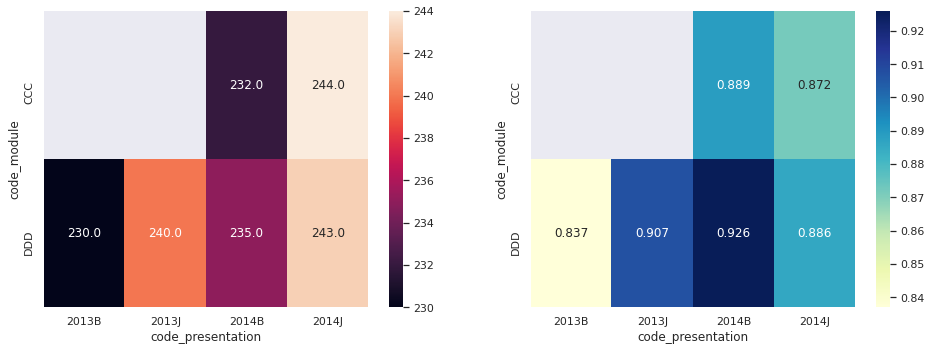

In [173]:
retetion(full_data)

Вывод: когортный анализ по семестрам не совсем нагляден и необходим из-за маленькой вариации

**6.RFM-анализ**

Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики:

R - среднее время сдачи одного экзамена, 

F - завершаемость курсов, 

M - среднее количество баллов, получаемое за экзамен. 

Для начала, выводим все те значения, которые мы уже считали в предыдущих заданиях, а именно среднее время сдачи экзамена, завершаемость курсов и среднее кол-во баллов за экзамен

### Метрика R

In [174]:
#рассчитывем средниее время сдачи экзаменов каждым студентом, включая и "неуспешные сдачи"
mean_date = full_data.query('assessment_type == "Exam"') \
    .groupby(['id_student'], as_index=False) \
    .agg({'date_submitted': 'mean'}) \
    .round() \
    .rename(columns={'date_submitted': 'recency'})

In [175]:
mean_date

,id_student,recency
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0
...,...,...
4628,2694886,236.0
4629,2694933,230.0
4630,2695608,237.0
4631,2697181,230.0


In [176]:
#так как выборка небольшая, разобъем наблюдения по терцилям для сроков сдачи(R)
recency_borders = mean_date.recency.quantile([.33, .66]).to_dict()
recency_borders

{0.33: 236.0, 0.66: 243.0}

В качестве границ метрики разобъем на равные группы: 33 и 66 перцентиль. Получем:

3 - до 33% будут самые быстрые в плане сдачи экзаменов студенты

2 - 33-66 % - группа со средним сроком сдачи

1 - после 66% - студенты, отстающие от основной группы

In [177]:
 def r_metrics(days, borders):
    if days <= borders[.33]:
        return '3'
    if days > borders[.33] and days <= borders[.66]:
        return '2'
    else:
        return '1'

In [178]:
mean_date['R'] = mean_date.recency.apply(lambda x: r_metrics(x, recency_borders))

In [179]:
mean_date

,id_student,recency,R
0,23698,243.0,2
1,24213,236.0,3
2,27116,243.0,2
3,28046,237.0,2
4,28787,243.0,2
...,...,...,...
4628,2694886,236.0,3
4629,2694933,230.0,3
4630,2695608,237.0,2
4631,2697181,230.0,3


### Метрика F

In [180]:
#считаем студентов пришедших на экзамен (необязательно сдавших)
students_passed = full_data.query('assessment_type == "Exam"') \
    .groupby(['id_student'], as_index=False) \
    .agg({'score': 'count'}) \
    .rename(columns={'score': 'submitted'}) \
    .sort_values('submitted')

In [181]:
#студенты, сдавшие экзамен
students_passed = students_passed.merge(
    full_data.query('assessment_type == "Exam" and score >= 40') \
                        .groupby(['id_student'], as_index=False) \
                        .agg({'score': 'count'}) \
                        .rename(columns={'score': 'passed'}) \
                        .sort_values('passed'),
        on=['id_student']) \
.fillna(0)

In [182]:
#завершаемость
students_passed['frequency'] = students_passed.passed / students_passed.submitted
students_passed

,id_student,submitted,passed,frequency
0,23698,1,1,1.0
1,626061,1,1,1.0
2,626103,1,1,1.0
3,626114,1,1,1.0
4,626132,1,1,1.0
...,...,...,...,...
4092,637691,2,1,0.5
4093,502554,2,2,1.0
4094,640773,2,2,1.0
4095,500006,2,1,0.5


In [183]:
frequency_borders = [0, 0.5, 1]

In [184]:
def f_metrics(completion, borders):
    if completion == borders[2]:
        return '3'
    elif completion == borders[1]:
        return '2'
    else:
        return '1'

In [185]:
students_passed['F'] = students_passed.frequency.apply(lambda x: f_metrics(x, frequency_borders))
students_passed

,id_student,submitted,passed,frequency,F
0,23698,1,1,1.0,3
1,626061,1,1,1.0,3
2,626103,1,1,1.0,3
3,626114,1,1,1.0,3
4,626132,1,1,1.0,3
...,...,...,...,...,...
4092,637691,2,1,0.5,2
4093,502554,2,2,1.0,3
4094,640773,2,2,1.0,3
4095,500006,2,1,0.5,2


Таким образом, завершаемость принимает 3 значения: 0, 0.5 и 1, соответственно разобъем студентов на три группы по этим значениям:
        
3 - 100% завершаемость 

2 - 50% завершаемость

1 - 0% завершаемость


In [186]:
#соединим получившиеся дата-сеты 
rfm = students_passed.merge(mean_date, on=['id_student'])

In [187]:
rfm

,id_student,submitted,passed,frequency,F,recency,R
0,23698,1,1,1.0,3,243.0,2
1,626061,1,1,1.0,3,234.0,3
2,626103,1,1,1.0,3,243.0,2
3,626114,1,1,1.0,3,234.0,3
4,626132,1,1,1.0,3,243.0,2
...,...,...,...,...,...,...,...
4092,637691,2,1,0.5,2,244.0,1
4093,502554,2,2,1.0,3,230.0,3
4094,640773,2,2,1.0,3,243.0,2
4095,500006,2,1,0.5,2,232.0,3


### Метрика M

In [188]:
rfm = rfm.merge(
    full_data.query('assessment_type == "Exam"') \
    .groupby(['id_student', 'code_module', 'code_presentation'], as_index=False) \
    .agg({'score': 'mean'}) \
    .rename(columns={'score': 'monetary'}),
    on=['id_student'])

In [189]:
rfm

,id_student,submitted,passed,frequency,F,recency,R,code_module,code_presentation,monetary
0,23698,1,1,1.0,3,243.0,2,CCC,2014J,80.0
1,626061,1,1,1.0,3,234.0,3,DDD,2014B,56.0
2,626103,1,1,1.0,3,243.0,2,CCC,2014J,66.0
3,626114,1,1,1.0,3,234.0,3,DDD,2014B,84.0
4,626132,1,1,1.0,3,243.0,2,DDD,2014J,64.0
...,...,...,...,...,...,...,...,...,...,...
4415,640773,2,2,1.0,3,243.0,2,DDD,2014J,47.0
4416,500006,2,1,0.5,2,232.0,3,CCC,2014B,38.0
4417,500006,2,1,0.5,2,232.0,3,DDD,2013B,56.0
4418,588482,2,2,1.0,3,243.0,2,CCC,2014J,66.0


In [190]:
rfm[rfm.monetary<40] #проверим включены ли студенты, не сдавшие экзамен
#всё есть, идём дальше

,id_student,submitted,passed,frequency,F,recency,R,code_module,code_presentation,monetary
3804,2388623,2,1,0.5,2,236.0,3,CCC,2014J,28.0
3814,145114,2,1,0.5,2,239.0,2,CCC,2014J,22.0
3820,643758,2,1,0.5,2,243.0,2,CCC,2014J,32.0
3834,606665,2,1,0.5,2,234.0,3,CCC,2014B,32.0
3856,561848,2,1,0.5,2,243.0,2,CCC,2014J,36.0
3860,601082,2,1,0.5,2,240.0,2,CCC,2014J,30.0
3870,566185,2,1,0.5,2,234.0,3,CCC,2014B,36.0
3902,619359,2,1,0.5,2,239.0,2,CCC,2014J,28.0
3908,620243,2,1,0.5,2,240.0,2,CCC,2014J,36.0
3912,621442,2,1,0.5,2,240.0,2,CCC,2014J,34.0


Начнем определять границы для сегментаций:
monetary(M) - среднее количество баллов, получаемое за экзамен.
Так как минимальный балл для сдачи это 40, то исходя из этих данных определяем следующую шкалу оценивания:

4 - 80-100: отлично

3 - 60-79:  хорошо

2 - 40-59:  удовлетворительно

1 - <40 : не зачтено


In [191]:
monetary_borders = [80, 60, 40]

In [192]:
#сегментируем
def m_metrics(score, borders):
    if score >= borders[0]:
        return '4'
    elif score >= borders[1]:
        return '3'
    elif score >= borders[2]:
        return '2'
    else:
        return '1'

In [193]:
rfm['M'] = rfm.monetary.apply(lambda x: m_metrics(x, monetary_borders))

In [194]:
rfm

,id_student,submitted,passed,frequency,F,recency,R,code_module,code_presentation,monetary,M
0,23698,1,1,1.0,3,243.0,2,CCC,2014J,80.0,4
1,626061,1,1,1.0,3,234.0,3,DDD,2014B,56.0,2
2,626103,1,1,1.0,3,243.0,2,CCC,2014J,66.0,3
3,626114,1,1,1.0,3,234.0,3,DDD,2014B,84.0,4
4,626132,1,1,1.0,3,243.0,2,DDD,2014J,64.0,3
...,...,...,...,...,...,...,...,...,...,...,...
4415,640773,2,2,1.0,3,243.0,2,DDD,2014J,47.0,2
4416,500006,2,1,0.5,2,232.0,3,CCC,2014B,38.0,1
4417,500006,2,1,0.5,2,232.0,3,DDD,2013B,56.0,2
4418,588482,2,2,1.0,3,243.0,2,CCC,2014J,66.0,3


In [195]:
#Скеливаем кластеры-бластеры RFM в одну колонку
rfm['RFM_score'] = rfm.R.astype(str)+ rfm.F.astype(str) + rfm.M.astype(str)
rfm

,id_student,submitted,passed,frequency,F,recency,R,code_module,code_presentation,monetary,M,RFM_score
0,23698,1,1,1.0,3,243.0,2,CCC,2014J,80.0,4,234
1,626061,1,1,1.0,3,234.0,3,DDD,2014B,56.0,2,332
2,626103,1,1,1.0,3,243.0,2,CCC,2014J,66.0,3,233
3,626114,1,1,1.0,3,234.0,3,DDD,2014B,84.0,4,334
4,626132,1,1,1.0,3,243.0,2,DDD,2014J,64.0,3,233
...,...,...,...,...,...,...,...,...,...,...,...,...
4415,640773,2,2,1.0,3,243.0,2,DDD,2014J,47.0,2,232
4416,500006,2,1,0.5,2,232.0,3,CCC,2014B,38.0,1,321
4417,500006,2,1,0.5,2,232.0,3,DDD,2013B,56.0,2,322
4418,588482,2,2,1.0,3,243.0,2,CCC,2014J,66.0,3,233


In [196]:
rfm.RFM_score.value_counts()

233    758
232    590
333    589
234    578
334    509
332    482
134    367
133    252
132    239
221     16
223     12
321     11
322      6
323      4
222      4
122      1
324      1
121      1
Name: RFM_score, dtype: int64

#### **Опишем сегменты**

**R - среднее время сдачи одного экзамена:** 

3 - быстро

2 - средне

1 - долго

**F - завершаемость курсов:**

3 - сложный экзамен

2 - средний экзамен

1 - легкий экзамен

**M - баллы за экзамен:**

4 - 80-100: отлично

3 - 60-79:  хорошо

2 - 40-59:  удовлетворительно

1 - <40 : не зачтено


In [197]:
#функция для сегминтации была взаимствована у коллеги, так как ручное описывание ни к чему дельному не приводило :(

def segmentation(rfm):
    segments = {
        0: {'1': 'отстающий студент', '2': 'средний студент', '3': 'быстрый студент'},
        1: {'3': 'на сложном экзамене', '2': 'на средней сложности экзамене', '1': 'на легком экзамене'},
        2: {'1': 'с неудовл. оценкой',
            '2': 'с удовл. оценкой',
            '3': 'с хор. оценкой',
            '4': 'с отл. оценкой'
        }
    }
    result = ''
    for i, rfm_score in enumerate(rfm, start=0):
        result += f'{segments[i][rfm_score]} '

    return result

In [198]:
rfm['segments'] = rfm.RFM_score.apply(lambda x: segmentation(x))

In [199]:
rfm

,id_student,submitted,passed,frequency,F,recency,R,code_module,code_presentation,monetary,M,RFM_score,segments
0,23698,1,1,1.0,3,243.0,2,CCC,2014J,80.0,4,234,средний студент на сложном экзамене с отл. оце...
1,626061,1,1,1.0,3,234.0,3,DDD,2014B,56.0,2,332,быстрый студент на сложном экзамене с удовл. о...
2,626103,1,1,1.0,3,243.0,2,CCC,2014J,66.0,3,233,средний студент на сложном экзамене с хор. оце...
3,626114,1,1,1.0,3,234.0,3,DDD,2014B,84.0,4,334,быстрый студент на сложном экзамене с отл. оце...
4,626132,1,1,1.0,3,243.0,2,DDD,2014J,64.0,3,233,средний студент на сложном экзамене с хор. оце...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,640773,2,2,1.0,3,243.0,2,DDD,2014J,47.0,2,232,средний студент на сложном экзамене с удовл. о...
4416,500006,2,1,0.5,2,232.0,3,CCC,2014B,38.0,1,321,быстрый студент на средней сложности экзамене ...
4417,500006,2,1,0.5,2,232.0,3,DDD,2013B,56.0,2,322,быстрый студент на средней сложности экзамене ...
4418,588482,2,2,1.0,3,243.0,2,CCC,2014J,66.0,3,233,средний студент на сложном экзамене с хор. оце...


In [200]:
#Удалим лишние колонки
rfm = rfm.drop(columns=['passed', 'submitted', 'M', 'R', 'F'])

In [201]:
#упорядочиваем
rfm = rfm[['id_student', 
           'recency', 
           'frequency', 
           'monetary', 
           'RFM_score', 
           'segments']]

In [202]:
#финальный df
rfm

,id_student,recency,frequency,monetary,RFM_score,segments
0,23698,243.0,1.0,80.0,234,средний студент на сложном экзамене с отл. оце...
1,626061,234.0,1.0,56.0,332,быстрый студент на сложном экзамене с удовл. о...
2,626103,243.0,1.0,66.0,233,средний студент на сложном экзамене с хор. оце...
3,626114,234.0,1.0,84.0,334,быстрый студент на сложном экзамене с отл. оце...
4,626132,243.0,1.0,64.0,233,средний студент на сложном экзамене с хор. оце...
...,...,...,...,...,...,...
4415,640773,243.0,1.0,47.0,232,средний студент на сложном экзамене с удовл. о...
4416,500006,232.0,0.5,38.0,321,быстрый студент на средней сложности экзамене ...
4417,500006,232.0,0.5,56.0,322,быстрый студент на средней сложности экзамене ...
4418,588482,243.0,1.0,66.0,233,средний студент на сложном экзамене с хор. оце...


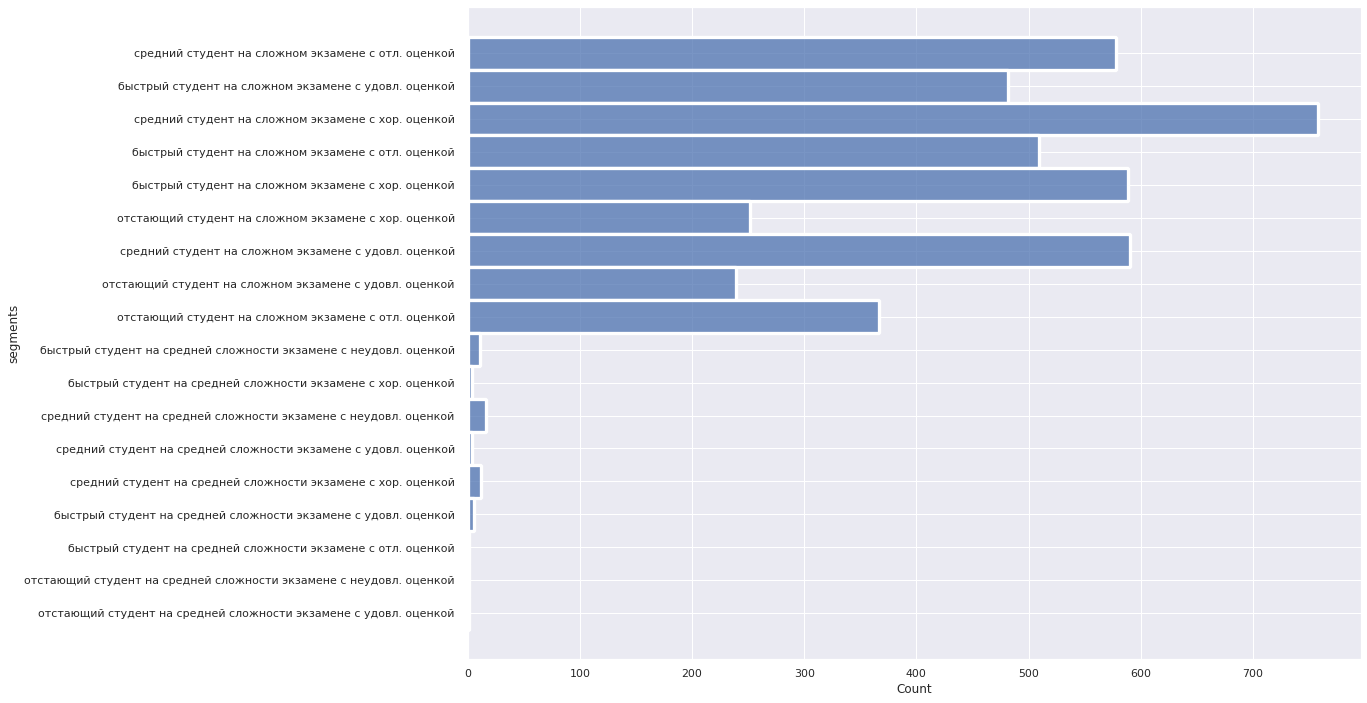

In [203]:
# сегменты по семестрам
sns.histplot(data=rfm, y="segments")